In [1]:
# importar las librerías necesarias
import os
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import EarlyStopping

In [2]:
base_dir = './chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:

import cv2
import numpy as np
import os

# Directorio que contiene las imágenes originales
directorio_imagenes_originales = "./chest_xray/train/NORMAL/"

# Directorio donde guardarás las nuevas imágenes generadas
directorio_destino = "./chest_xray/train/NORMAL/"

# Carga las imágenes originales desde la carpeta
imagenes_originales = []
for nombre_archivo in os.listdir(directorio_imagenes_originales):
    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)
    if os.path.isfile(ruta_archivo):
        imagen = cv2.imread(ruta_archivo, 0)  # carga la imagen en escala de grises
        imagen = cv2.resize(imagen, (256, 256))  # redimensiona la imagen a 256x256
        imagen = np.expand_dims(imagen, axis=-1)  # añade una dimensión de canal (grayscale)
        imagenes_originales.append(imagen)

# Aplica técnicas de aumento de datos para generar nuevas imágenes
imagenes_generadas = []
for imagen_original in imagenes_originales:
    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.
    # Por ejemplo, vamos a voltear horizontalmente la imagen y cambiar su brillo
    imagen_flip = cv2.flip(imagen_original, 1)  # 1 para flip horizontal
    imagen_brillo = cv2.add(imagen_original, np.array([50.0]))  # Aumenta el brillo en 50

    # Agrega las imágenes generadas a la lista de imágenes generadas
    imagenes_generadas.append(imagen_flip)
    imagenes_generadas.append(imagen_brillo)

# Guarda las imágenes generadas en el directorio de destino
for i, imagen_generada in enumerate(imagenes_generadas):
    nombre_archivo = f"imagen_generada_{i}.jpeg"  # Cambia la extensión dependiendo del tipo de imagen
    ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
    cv2.imwrite(ruta_archivo, imagen_generada)

print("Imágenes generadas guardadas exitosamente.")


Imágenes generadas guardadas exitosamente.


In [7]:
# definir los parámetros de la red convolucional
input_shape = (256, 256, 1)
num_classes = 2
learning_rate = 0.0001
batch_size = 32
epochs = 10

# Clasificación 1: Pneumonia vs Normal
CLASS_NAMES = ['Normal', 'Pneumonia']

# crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# definir el tamaño de las imágenes de destino y el modo de color
target_size = (256, 256)
color_mode = 'grayscale'

# crear generadores de datos para imágenes en escala de grises de tamaño 256x256
train_datagen = ImageDataGenerator(
    rescale=1./255)

val_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode=color_mode,  # especificar que las imágenes son en escala de grises
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode=color_mode,  # especificar que las imágenes son en escala de grises
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode=color_mode,  # especificar que las imágenes son en escala de grises
    class_mode='categorical')


Found 7898 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
# definir la arquitectura de la red
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [10]:
# compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

In [11]:
# Crear el callback EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', baseline=0.2, restore_best_weights=True)

# Entrenar el modelo con el callback EarlyStopping
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    #callbacks=[early_stop]
)


Epoch 1/10
247/247 [==============================] - 364s 1s/step - loss: 0.1991 - accuracy: 0.9202 - val_loss: 0.3158 - val_accuracy: 0.8750
Epoch 2/10
247/247 [==============================] - 435s 2s/step - loss: 0.0872 - accuracy: 0.9676 - val_loss: 0.1923 - val_accuracy: 0.9375
Epoch 3/10
247/247 [==============================] - 447s 2s/step - loss: 0.0603 - accuracy: 0.9775 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 4/10
247/247 [==============================] - 422s 2s/step - loss: 0.0507 - accuracy: 0.9809 - val_loss: 0.7971 - val_accuracy: 0.6875
Epoch 5/10
247/247 [==============================] - 550s 2s/step - loss: 0.0466 - accuracy: 0.9830 - val_loss: 0.1290 - val_accuracy: 0.8750
Epoch 6/10
247/247 [==============================] - 630s 3s/step - loss: 0.0342 - accuracy: 0.9872 - val_loss: 0.4408 - val_accuracy: 0.8750
Epoch 7/10
247/247 [==============================] - 550s 2s/step - loss: 0.0290 - accuracy: 0.9895 - val_loss: 0.3908 - val_accuracy: 0.8125

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

20/20 [==============================] - 15s 751ms/step - loss: 1.2478 - accuracy: 0.7564
Test accuracy: 0.7564102411270142


In [13]:
# Hacer predicciones en el conjunto de prueba
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)


# Calcular el porcentaje de aciertos
correct_pred = np.sum(test_pred_labels == test_generator.classes)
total_pred = len(test_generator.classes)
accuracy = correct_pred / total_pred * 100

print('Test prediction: {:.2f}%'.format(accuracy))


20/20 [==============================] - 13s 612ms/step
Test prediction: 59.29%


In [14]:
# imprimir la matriz de confusión
test_true_labels = test_generator.classes
cm = confusion_matrix(test_true_labels, test_pred_labels)

print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[ 35 199]
 [ 55 335]]


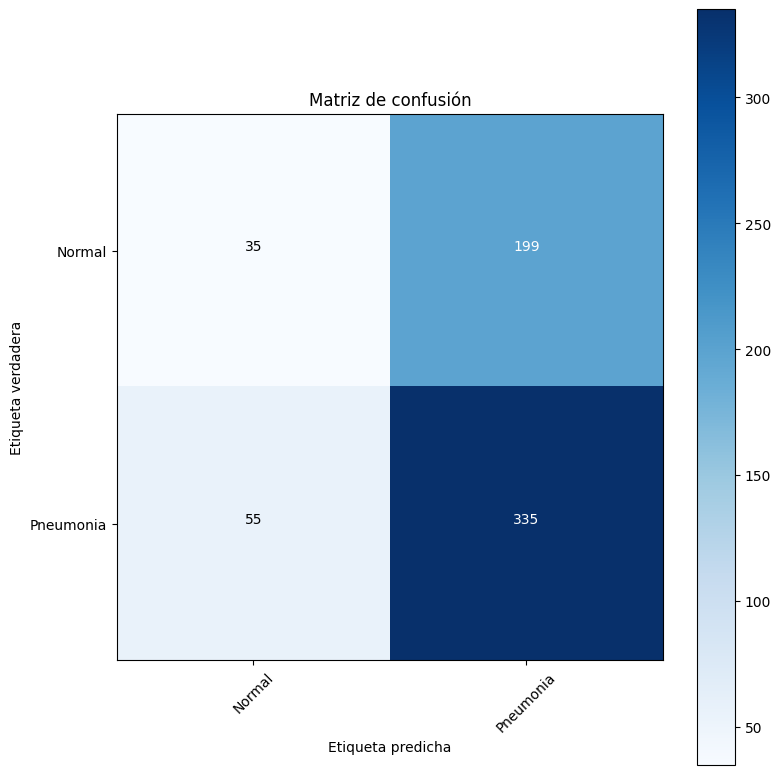

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(CLASS_NAMES))
plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
plt.yticks(tick_marks, CLASS_NAMES)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

In [16]:
# Evaluamos el modelo con los datos del conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

20/20 [==============================] - 8s 410ms/step - loss: 1.2478 - accuracy: 0.7564
Test accuracy: 0.7564102411270142


In [17]:
# Evaluamos el modelo con los datos del conjunto de test
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)

1/1 [==============================] - 0s 361ms/step - loss: 0.1248 - accuracy: 0.9375
Validation accuracy: 0.9375


Text(0.5, 1.0, 'Evolución de precisión')

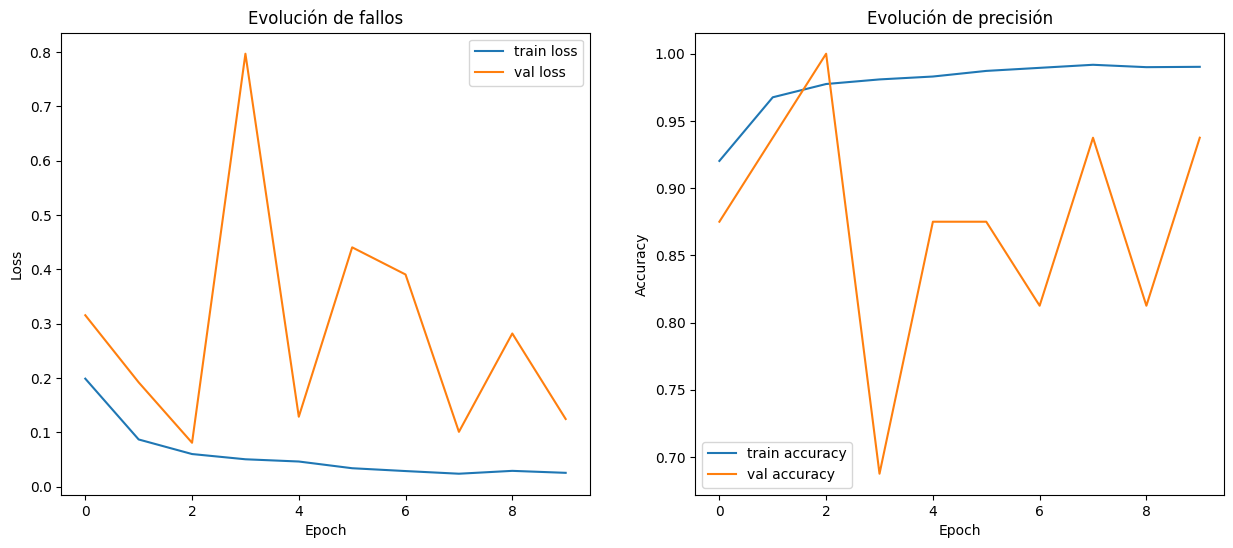

In [18]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(val_loss, label='val loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Evolución de fallos')

ax[1].plot(train_acc, label='train accuracy')
ax[1].plot(val_acc, label='val accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title('Evolución de precisión')

In [19]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [20]:
def predict_image(img_path, prediction):

    # Cargamos la imagen
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convertimos el arreglo de predicciones a una etiqueta de texto
    label = CLASS_NAMES[np.argmax(prediction)]
    
    # Mostramos la imagen con la etiqueta de predicción
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()

    # Convertimos la imagen a un array de numpy
    img_array = img_to_array(img)
    
    # Añadimos una dimensión extra al array para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocesamos la imagen dividiendo cada pixel entre 255
    img_array = img_array / 255.0
    
    # Predecimos la categoría de la imagen
    predictions = model.predict(img_array)
    
    # Imprimimos las probabilidades de pertenencia a cada posible categoría
    print('Probabilidades:')
    for i in range(len(CLASS_NAMES)):
        print('{}: {:.2f}%'.format(CLASS_NAMES[i], predictions[0][i]*100))
    
    # Imprimimos la categoría más probable
    predicted_class = np.argmax(predictions[0])
    print('Predicción:', CLASS_NAMES[predicted_class])
    print()
    print()

In [21]:
def predict_folder(folder_path):
    # Obtener la lista de nombres de archivo de la carpeta
    filenames = os.listdir(folder_path)

    for filename in filenames:
        # Obtener la ruta completa del archivo de imagen
        img_path = os.path.join(folder_path, filename)

        # Cargar la imagen como un arreglo numpy
        img_array = img_to_array(load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH)))

        # Añadir una dimensión extra para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocesar la imagen dividiendo cada pixel entre 255
        img_array = img_array / 255.0

        # Predecir la categoría de la imagen y mostrar la etiqueta
        prediction = model.predict(img_array)
        predict_image(img_path, prediction)


In [24]:
import cv2

def predict_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            
            # Cargar y preprocesar la imagen
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Cargar en escala de grises
            img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) # Redimensionar
            img_array = img / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            img_array = np.expand_dims(img_array, axis=-1) # Agregar dimensión de canal
            
            # Predecir la categoría de la imagen y mostrar la etiqueta
            prediction = model.predict(img_array)
            predict_image(img_path, prediction)


1/1 [==============================] - 1s 580ms/step


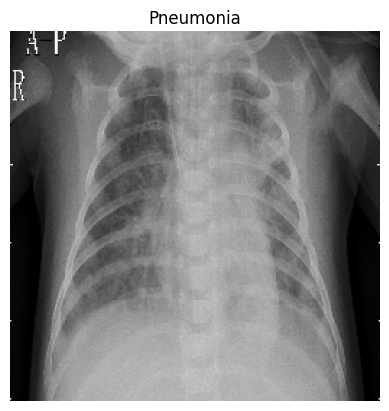

UnimplementedError: Graph execution error:

Detected at node 'sequential_1/conv2d_1/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ale07\AppData\Local\Temp\ipykernel_7232\4227118867.py", line 2, in <module>
      predict_folder(folder_path)
    File "C:\Users\ale07\AppData\Local\Temp\ipykernel_7232\3111510721.py", line 17, in predict_folder
      predict_image(img_path, prediction)
    File "C:\Users\ale07\AppData\Local\Temp\ipykernel_7232\672447274.py", line 24, in predict_image
      predictions = model.predict(img_array)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_1/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_1/conv2d_1/Relu}}]] [Op:__inference_predict_function_12846]

In [26]:
folder_path = './chest_xray/val/PNEUMONIA/'
predict_folder(folder_path)

In [23]:
folder_path = './chest_xray/val/NORMAL/'
predict_folder(folder_path)

ValueError: in user code:

    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ale07\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_1" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
      • training=False
      • mask=None
